In [13]:
%load_ext autoreload
%autoreload 2
% pylab inline

pylab.rcParams['figure.figsize'] = (15, 6)

import seaborn as sns

sns.set_style("darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:pylab import has clobbered these variables: ['f', 'multivariate_normal']
`%matplotlib` prevents importing * from pylab and numpy


 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:overflow encountered in exp
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:overflow encountered in double_scalars
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in double_scalars
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning:invalid value encountered in subtract
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning:invalid value encountered in greater


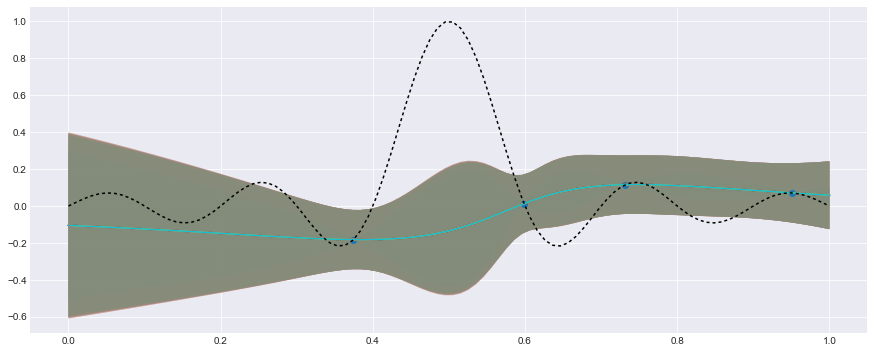

In [14]:
from src.bo import *
from src.dngo import *

def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None]

rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 4)[:, None]
y_train = f(x_train)

################

nn = TFModel(dim_basis=50, epochs=1000, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=20, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
model.plot_prediction(x,y)

 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:overflow encountered in exp
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in double_scalars
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:overflow encountered in double_scalars
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning:invalid value encountered in subtract
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning:invalid value encountered in greater


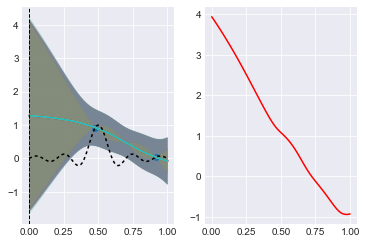

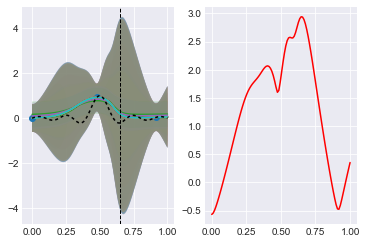

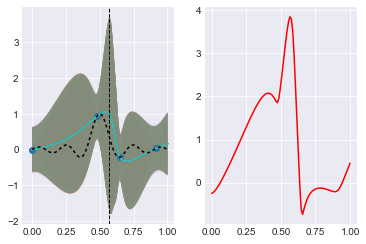

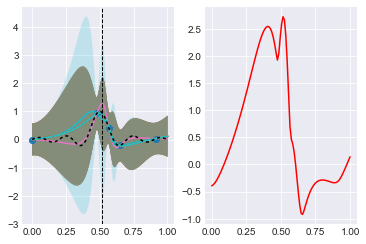

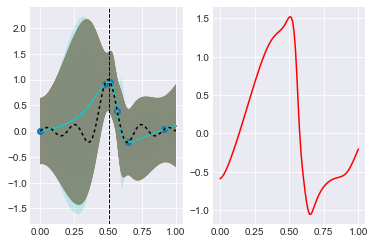

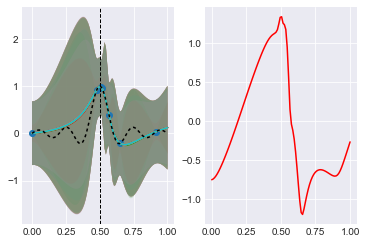

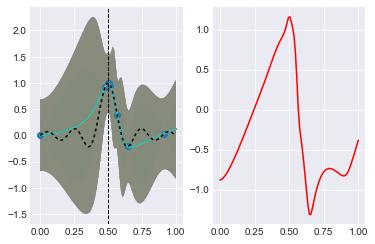

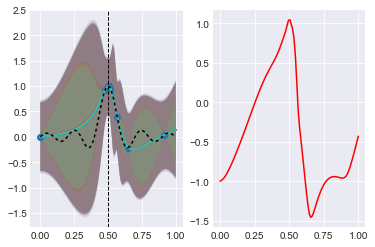

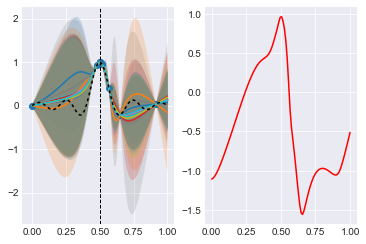

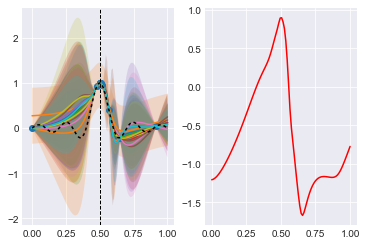

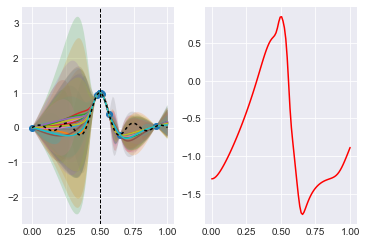

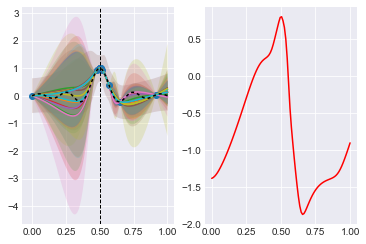

emcee: Exception while calling your likelihood function:
  params: [-4.93891835  8.24929147]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/bayesian_linear_regression.py", line 65, in marginal_log_likelihood
    l = mll + self.prior.lnprob(theta)
  File "/Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py", line 37, in lnprob
    return self.ln_prior_alpha.logpdf(theta[0]) \
  File "/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py", line 453, in logpdf
    return self.dist.logpdf(x, *self.args, **self.kwds)
  File "/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py", line 1702, in logpdf
    goodargs = argsreduce(cond, *((x,)+args+(scale,)))
  File "/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/stats/_distn_infras

KeyboardInterrupt: 

In [8]:
bo = BO(f, model, n_iter=20, bounds=np.array([[0,1]]))
bo.run()

In [16]:
from hpolib.benchmarks.synthetic_functions import Branin


f = Branin()
info = f.get_meta_information()
bounds = np.array(info['bounds'])
# ... random sample from hypercube

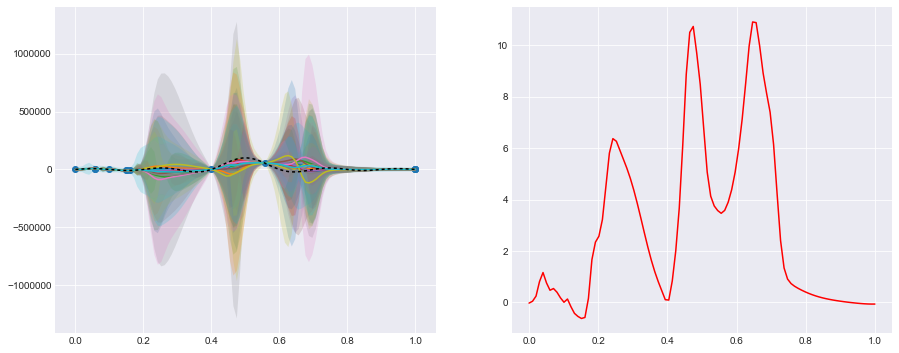

In [15]:
bo.plot_prediction()

In [16]:
bo.model.add_observations([], [])

ValueError: all the input arrays must have same number of dimensions